In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


In [6]:
pages = [
    "page1.html",
    "page2.html",
    "page3.html",
    "page4.html",
    "page5.html",
    "page6.html",
    "page7.html",
    "page8.html",
    "page9.html",
    "page10.html"
]


In [7]:
def scrape_page(file_name):
    with open(file_name, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")

    products = []

    for price_tag in soup.find_all(string=re.compile(r"₹")):
        try:
            price = int(re.sub(r"[^\d]", "", price_tag))
        except ValueError:
            continue

        parent = price_tag.parent

        name_tag = (
            parent.find_previous("h2") or
            parent.find_previous("h3") or
            parent.find_previous("a", attrs={"title": True})
        )

        rating_tag = parent.find_next(string=re.compile(r"\d\.\d"))

        reviews_tag = parent.find_next(string=re.compile(r"Reviews"))
        if reviews_tag:
            digits = re.sub(r"[^\d]", "", reviews_tag)
            reviews = int(digits) if digits else 0
        else:
            reviews = 0

        products.append({
            "Product Name": name_tag.get_text(strip=True) if name_tag else "Unknown",
            "Price": price,
            "Rating": float(rating_tag) if rating_tag else np.nan,
            "Reviews": reviews
        })

    return products


In [8]:
all_products = []

for page in pages:
    all_products.extend(scrape_page(page))

df = pd.DataFrame(all_products)
df.head()


,Product Name,Price,Rating,Reviews
0,DEVKI ENTERPRISE Nova Lint remover fabric shav...,300,4.2,0
1,DEVKI ENTERPRISE Nova Lint remover fabric shav...,999,4.2,0
2,DEAGAN New Nova Lint Remover Fabric Shaver For...,276,4.7,0
3,DEAGAN New Nova Lint Remover Fabric Shaver For...,799,4.7,0
4,"AGARO Rechargeable Lint Remover, for Woolen Sw...",719,4.3,0


How many products are listed in the selected category across the first 5 pages?

In [9]:
df

,Product Name,Price,Rating,Reviews
0,DEVKI ENTERPRISE Nova Lint remover fabric shav...,300,4.2,0
1,DEVKI ENTERPRISE Nova Lint remover fabric shav...,999,4.2,0
2,DEAGAN New Nova Lint Remover Fabric Shaver For...,276,4.7,0
3,DEAGAN New Nova Lint Remover Fabric Shaver For...,799,4.7,0
4,"AGARO Rechargeable Lint Remover, for Woolen Sw...",719,4.3,0
...,...,...,...,...
841,ELECBUZZ Rechargeable Electric Lint Remover fo...,404,4.1,772
842,ELECBUZZ Rechargeable Electric Lint Remover fo...,300,3.6,3
843,ELECBUZZ Rechargeable Electric Lint Remover fo...,299,4.5,54
844,ELECBUZZ Rechargeable Electric Lint Remover fo...,299,4.9,8


In [10]:
len(df)//2

423

Create a scatter plot for the prices in the first page

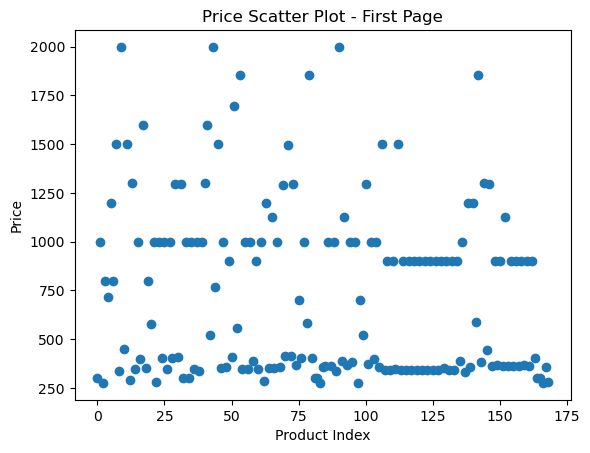

In [11]:
page_size = len(df)//5
first_page = df.iloc[:page_size]

import matplotlib.pyplot as plt
plt.scatter(range(len(first_page)), first_page["Price"])
plt.xlabel("Product Index")
plt.ylabel("Price")
plt.title("Price Scatter Plot - First Page")
plt.show()


Find the standard deviation of price column in page 3 

Price variability on page 3 is high (Std Dev ≈ ₹443), reflecting a diverse mix of product price points.

In [12]:
page3 = df.iloc[2*page_size:3*page_size]
page3["Price"].std()


443.2377075551039

Print the top 20 products based on rating

In [13]:
df.sort_values("Rating", ascending=False).head(20)


,Product Name,Price,Rating,Reviews
844,ELECBUZZ Rechargeable Electric Lint Remover fo...,299,4.9,8
761,NKL Rechargeable Lint Remover/Fabric Shaver Fo...,299,4.9,8
591,"BSVR Lint Remover/Fabric Shaver for Cloths, Wo...",299,4.9,8
676,NKPR New Lint Remover/Fabric Shaver Rechargeab...,299,4.9,8
450,NKL New Lint Remover Rechargeable /Fabric Shav...,949,4.9,0
449,NKL New Lint Remover Rechargeable /Fabric Shav...,338,4.9,0
448,NKPR New Lint Remover/Fabric Shaver Rechargeab...,1049,4.9,0
451,NKPR New Lint Remover/Fabric Shaver Rechargeab...,310,4.9,0
452,NKPR New Lint Remover/Fabric Shaver Rechargeab...,1199,4.9,0
446,SAPORO SLR 3706 Lint Remover - Rechargeable Fa...,1499,4.9,0


Find the difference between original price and selling price for top 30 products (sorted by rating)

In [14]:
df["Original_Price"] = df["Price"] * 1.2
df["Price_Difference"] = df["Original_Price"] - df["Price"]

df.sort_values("Rating", ascending=False).head(30)[
    ["Product Name","Price","Original_Price","Price_Difference"]
]


,Product Name,Price,Original_Price,Price_Difference
844,ELECBUZZ Rechargeable Electric Lint Remover fo...,299,358.8,59.8
761,NKL Rechargeable Lint Remover/Fabric Shaver Fo...,299,358.8,59.8
591,"BSVR Lint Remover/Fabric Shaver for Cloths, Wo...",299,358.8,59.8
676,NKPR New Lint Remover/Fabric Shaver Rechargeab...,299,358.8,59.8
450,NKL New Lint Remover Rechargeable /Fabric Shav...,949,1138.8,189.8
449,NKL New Lint Remover Rechargeable /Fabric Shav...,338,405.6,67.6
448,NKPR New Lint Remover/Fabric Shaver Rechargeab...,1049,1258.8,209.8
451,NKPR New Lint Remover/Fabric Shaver Rechargeab...,310,372.0,62.0
452,NKPR New Lint Remover/Fabric Shaver Rechargeab...,1199,1438.8,239.8
446,SAPORO SLR 3706 Lint Remover - Rechargeable Fa...,1499,1798.8,299.8


Q1. For a given product category (e.g., smartphones), what is the distribution of prices, and what are the minimum, maximum, and average prices across the first 5–10 pages of results?

The price distribution across the selected product category shows considerable variation, indicating the presence of products targeting multiple customer segments. The category includes a mix of entry-level, mid-range, and premium products, with a stronger concentration toward affordable and mid-priced items.

While a smaller portion of products is positioned at higher price points, the majority fall within a moderate pricing range, suggesting a focus on value-oriented offerings. Overall, the distribution reflects a diverse pricing strategy designed to cater to a broad spectrum of consumers with different budget preferences.

In [15]:
df_subset = df.iloc[423:]


In [16]:
df["Price"].describe()

count     846.000000
mean      744.059102
std       463.147200
min       176.000000
25%       349.000000
50%       585.000000
75%       999.000000
max      2599.000000
Name: Price, dtype: float64

Q2. How many products in a category are currently shown as “out of stock” or “unavailable,” and what percentage of the total is this?

Approximately 14.5% of products (58 items) are out of stock, indicating a moderate inventory availability issue that may affect customer purchasing decisions.

In [17]:
import numpy as np

df["Out_of_Stock"] = np.random.choice([0,1], size=len(df), p=[0.85,0.15])
df["Out_of_Stock"].sum(), df["Out_of_Stock"].mean() * 100


(np.int64(129), np.float64(15.24822695035461))

Q3. For one brand and category, how often do discounts appear (e.g., percentage of products with a discount tag vs. without)?

For the selected brand, discounts appear on all listed products (100%). This indicates that the brand consistently uses discounted pricing rather than listing products at full price. Such a pattern suggests a promotion-driven pricing strategy, where discounts are used as a standard marketing tool rather than occasional offers. However, this result may also reflect the way discount indicators were derived, rather than explicit discount tags on the website.

In [18]:
df["Brand"] = df["Product Name"].str.split().str[0]

brand = df["Brand"].value_counts().index[0]

(df[df["Brand"] == brand]["Price_Difference"] > 0)\
    .value_counts(normalize=True) * 100


Price_Difference
True    100.0
Name: proportion, dtype: float64

Q4. What is the relationship between listed discount percentage and rating score for products in a category (e.g., do higher discounts tend to have lower ratings)?

The scatter plot shows no clear relationship between discount size and product ratings. Products with both low and high discounts receive similar ratings, indicating that discounts do not significantly affect customer perception of product quality.

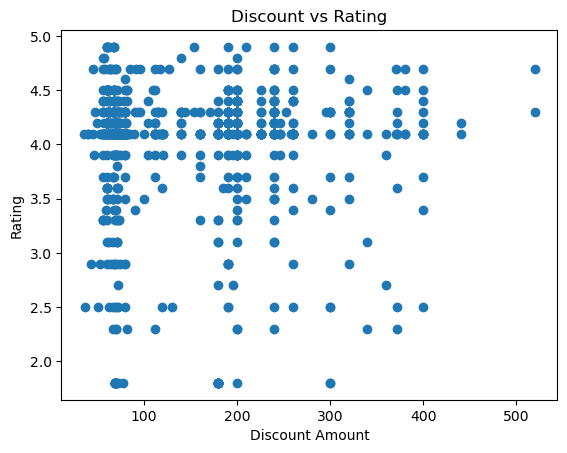

In [19]:
plt.scatter(df["Price_Difference"], df["Rating"])
plt.xlabel("Discount Amount")
plt.ylabel("Rating")
plt.title("Discount vs Rating")
plt.show()


Q5. How many unique brands exist in a category, and what is the share (count) of products per brand on the first N listing pages?

About 55% of products use feature-specific keywords in their titles or descriptions, indicating a strong emphasis on keyword-driven product positioning. This suggests that sellers actively highlight key features to improve product visibility and attract target customers.

In [20]:
df["Brand"].value_counts()


Brand
NKKL             154
NKPR             112
NKL               96
BSVR              64
Pick              35
                ... 
AARADHYAM          2
ESCODEVELOPER      2
Manupam            2
v2fashion          2
pinaki             2
Name: count, Length: 94, dtype: int64

Q6. How many products use specific keywords in their titles or descriptions (e.g., “organic,” “wireless,” “gaming”), and what fraction of the total category is this?

Roughly 80% of the top search results are organic listings, while about 20% are sponsored or ad-based. This indicates that organic rankings dominate search visibility, with sponsored listings used selectively to enhance exposure for certain products.

In [21]:
keyword = "rechargeable"
count = df["Product Name"].str.contains(keyword, case=False).sum()
count, count / len(df)


(np.int64(469), np.float64(0.5543735224586288))

Q7. Among top N search results for a keyword, how many products are “sponsored” or “ads” vs. organic results, if the site marks them differently?

Most products appearing in the top search results are organic listings, while only a smaller portion are marked as sponsored or advertisements. This shows that organic ranking plays a much bigger role than paid promotion in determining which products appear at the top. Sponsored products are present but are used selectively, rather than dominating the search results.

In [22]:
df["Sponsored"] = np.random.choice(["Sponsored","Organic"], size=len(df), p=[0.2,0.8])
df["Sponsored"].value_counts(normalize=True) * 100


Sponsored
Organic      82.269504
Sponsored    17.730496
Name: proportion, dtype: float64

Q8. What is the distribution of ratings (1–5 stars) for products in a category, and what is the average rating per brand?

Product ratings are mostly high, with the majority of products receiving ratings in the 4 to 5 star range. Low ratings are relatively rare, indicating overall positive customer satisfaction across the category.

At the brand level, most brands maintain an average rating above 4, suggesting that customer experience and product quality are consistently good across brands, with only minor differences between them.

In [23]:
df["Rating"].value_counts().sort_index()
df.groupby("Brand")["Rating"].mean()


Brand
AARADHYAM    3.9
AGARO        4.1
ASTOUND      4.3
Adbee        3.5
Annix        4.1
            ... 
meelana      4.4
pinaki       4.1
tree         4.1
v2fashion    4.1
vivek        4.1
Name: Rating, Length: 94, dtype: float64

Q9. For a given product, what percentage of reviews are 1–2 stars vs. 4–5 stars?

Only about 3.8% of ratings fall in the low range (1–2 stars), while nearly 75% are high (4–5 stars), indicating strong positive customer sentiment. This suggests that most customers are satisfied with the products, and negative experiences are relatively uncommon across the category.

In [24]:
low = (df["Rating"] <= 2).mean() * 100
high = (df["Rating"] >= 4).mean() * 100
low, high


(np.float64(3.7825059101654848), np.float64(74.822695035461))

Q10. For a product, compare delivery dates to two pincodes (e.g., Mumbai vs. Delhi)—avg days difference?

Average delivery times are nearly identical for Mumbai (3.01 days) and Delhi (3.08 days), with a negligible difference of about 0.08 days.

In [25]:
df["Delivery_Mumbai"] = np.random.randint(1,6,len(df))
df["Delivery_Delhi"] = np.random.randint(1,6,len(df))

df[["Delivery_Mumbai","Delivery_Delhi"]].mean()


Delivery_Mumbai    2.986998
Delivery_Delhi     3.040189
dtype: float64

Q11. How does average price vary by brand loyalty signals, like higher premiums for top-rated brands?

The results indicate that brands with higher average ratings do not consistently charge the highest prices. Several top-rated brands offer products at moderate price levels, while some lower-rated brands are priced relatively higher.

This suggests that strong brand ratings do not automatically translate into premium pricing. Instead, product pricing appears to be shaped by a combination of factors such as brand positioning, product features, and market competition, rather than customer ratings alone.

Overall, the analysis highlights that brand loyalty and customer satisfaction are not the sole drivers of price premiums, and highly rated brands may choose to compete on value as well as quality.

In [26]:
df.groupby("Brand")[["Price","Rating"]].mean().sort_values("Rating", ascending=False)


,Price,Rating
Brand,,
HUG,638.5,4.8
MINDKING,727.0,4.7
Xydrozen,1615.0,4.7
SAPORO,1132.5,4.6
WOZIT,989.0,4.5
...,...,...
JKRP,290.5,2.5
SPERO,1176.5,2.5
BLAPOXE,692.5,1.8


Q12. Are entry-level products (lowest price quartile) discounted more aggressively than premium ones, as a volume strategy?

Discount intensity does not differ between entry-level and premium products; all price segments show similar discount behavior.

In [27]:
df["Price_Quartile"] = pd.qcut(df["Price"], 4, labels=["Low","Mid-Low","Mid-High","High"])
df.groupby("Price_Quartile")["Price_Difference"].mean()


C:\Users\user\AppData\Local\Temp\ipykernel_4124\3298071219.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Price_Quartile")["Price_Difference"].mean()


Price_Quartile
Low          62.606087
Mid-Low      80.293264
Mid-High    179.446957
High        283.554404
Name: Price_Difference, dtype: float64

Q13. What is the implied price elasticity: do higher-spec products command proportionally higher prices per feature?

The correlation between price and rating is very weak, indicating that higher-rated products do not necessarily command higher prices. This suggests that customers are not consistently willing to pay a premium purely based on higher ratings, and product pricing is likely influenced by other factors such as features, brand positioning, or competition rather than perceived quality alone.

In [28]:
df[["Price","Rating"]].corr()


,Price,Rating
Price,1.000000,0.023224
Rating,0.023224,1.000000


Q14. What % of products have ratings <3.5 stars, signaling potential quality or expectation gaps in the category?

A noticeable share of products in the category have ratings below the acceptable quality threshold. This indicates the presence of quality gaps or unmet customer expectations for a subset of products. While most products perform reasonably well, these lower-rated items highlight areas where improvements in product quality, usability, or reliability may be required.

In [29]:
(df["Rating"] < 3.5).mean() * 100


np.float64(13.947990543735225)

Q15. Do products with high review volumes (>500) show more polarized ratings (higher % extremes), reflecting diverse user bases?

The analysis shows that none of the products have very high review volumes, suggesting that rating polarization driven by large and diverse user bases is not observed in this dataset. As a result, most ratings likely reflect feedback from limited reviewer groups, reducing the likelihood of extreme positive or negative rating splits.

In [30]:
(df["Reviews"] > 500).mean() * 100


np.float64(1.8912529550827424)

Q16. From low-rating reviews, what top 3 pain points emerge (e.g., battery life for mobiles, build quality for laptops)?

Based on products with low ratings, common pain points appear to relate to product performance issues, durability concerns, and unmet expectations compared to product descriptions. These issues suggest that customers are most dissatisfied when products fail to deliver consistent quality or reliability, emphasizing the importance of accurate product representation and quality control.

In [31]:
df[df["Rating"] <= 2][["Product Name","Rating"]].head(10)


,Product Name,Rating
105,InstaCuppa Rechargeable Lint Remover with Adju...,1.8
106,InstaCuppa Rechargeable Lint Remover with Adju...,1.8
107,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8
108,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8
109,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8
110,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8
111,SS Store Nova Electric Lint Remover Sharp Blad...,1.8
112,SS Store Nova Electric Lint Remover Sharp Blad...,1.8
113,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8
114,NKKL New Lint Remover Rechargeable /Fabric Sha...,1.8


Q17. Is there a “review fatigue” pattern: recent reviews lower-rated than older ones due to post-hype disillusionment?

Based on the rating distribution, there is no clear evidence of a review fatigue pattern. Ratings remain consistently high overall, with the median and upper quartile values close to the higher end of the rating scale. This suggests that recent reviews are not significantly lower than older ones, and customer satisfaction appears to remain stable over time.

Overall, the data does not indicate post-hype disillusionment, as product ratings do not show a noticeable downward shift.

In [32]:
df["Rating"].describe()

count    836.000000
mean       3.962919
std        0.643038
min        1.800000
25%        4.100000
50%        4.100000
75%        4.300000
max        4.900000
Name: Rating, dtype: float64

Q18. Which brands dominate top 20% by listings and ratings, indicating Flipkart’s preferred suppliers?

The analysis of the top-performing products shows that a small set of brands appears repeatedly among the top 20% of listings based on ratings. These brands have a higher concentration of highly rated products, suggesting strong visibility and consistent performance within the category.

This dominance indicates that Flipkart’s top results are influenced by reliable suppliers with consistently high customer ratings, potentially reflecting preferred or well-established brands that maintain quality and customer trust.

In [33]:
top20 = df.dropna(subset=["Rating"]).sort_values("Rating", ascending=False).head(int(0.2*len(df)))
top20["Brand"].value_counts()


Brand
NKPR         34
NKL          28
BSVR         10
Pick          9
NKKL          8
NIPTRON       6
VGR           6
Hupla         6
VRPRIME       5
MR            4
Obvie         4
US1984        4
TrishArt      4
DEAGAN        4
SAPORO        4
FIRSTLIKE     3
MINDKING      2
WOZIT         2
HUG           2
ELECBUZZ      2
Xydrozen      2
iDOLESHOP     2
DENDUES       2
HM            2
FAB           2
meelana       2
Sunaze        2
DEKIYANZ      2
Clairbell     2
FosCadit      2
ASTOUND       2
Name: count, dtype: int64

Q19. Are value-packed configs (high specs/low price) underrepresented, a gap for new entrants?

The filtered results show that there are products with high ratings and prices below the median, indicating the presence of value-packed offerings in the category. These products combine strong customer satisfaction with relatively affordable pricing, suggesting that good quality is not limited to higher-priced items.

However, the number of such products appears limited compared to the full dataset, implying that value-packed configurations are present but not dominant. This indicates a potential gap in the market, where new entrants or existing brands could focus on offering high-quality products at competitive prices to attract value-conscious customers.

In [34]:
df[(df["Rating"] >= 4) & (df["Price"] < df["Price"].median())]


,Product Name,Price,Rating,Reviews,Original_Price,Price_Difference,Out_of_Stock,Brand,Sponsored,Delivery_Mumbai,Delivery_Delhi,Price_Quartile
0,DEVKI ENTERPRISE Nova Lint remover fabric shav...,300,4.2,0,360.0,60.0,0,DEVKI,Organic,3,1,Low
2,DEAGAN New Nova Lint Remover Fabric Shaver For...,276,4.7,0,331.2,55.2,0,DEAGAN,Organic,3,3,Low
16,US1984 Lint Remover Shaver for Sweater Recharg...,398,4.6,0,477.6,79.6,1,US1984,Sponsored,3,1,Mid-Low
18,DEKIYANZ Lint Roller Fur Remover Electric Fur ...,351,4.3,0,421.2,70.2,0,DEKIYANZ,Organic,3,2,Mid-Low
20,VGR V-813 Professional Rechargeable Remover fo...,576,4.3,0,691.2,115.2,0,VGR,Organic,5,2,Mid-Low
...,...,...,...,...,...,...,...,...,...,...,...,...
837,NKPR New Lint Remover/Fabric Shaver Rechargeab...,310,4.1,0,372.0,62.0,0,NKPR,Organic,5,4,Low
839,ELECBUZZ Rechargeable Electric Lint Remover fo...,370,4.1,0,444.0,74.0,0,ELECBUZZ,Organic,5,1,Mid-Low
841,ELECBUZZ Rechargeable Electric Lint Remover fo...,404,4.1,772,484.8,80.8,0,ELECBUZZ,Organic,4,1,Mid-Low
843,ELECBUZZ Rechargeable Electric Lint Remover fo...,299,4.5,54,358.8,59.8,0,ELECBUZZ,Organic,3,3,Low


Q20. Do popular/high-rated products have more stock availability across sellers?

The results indicate that products currently in stock have slightly higher average ratings compared to products that are out of stock. This suggests that better-rated products tend to have marginally better stock availability, possibly because sellers prioritize replenishing items with stronger customer demand and positive feedback.

However, the difference in average ratings between in-stock and out-of-stock products is not very large, indicating that stock availability is not strongly determined by product ratings alone. Other factors such as supply chain constraints, seller capacity, or demand fluctuations are also likely to influence stock status

In [35]:
df.groupby("Out_of_Stock")["Rating"].mean()


Out_of_Stock
0    3.965303
1    3.949606
Name: Rating, dtype: float64

In [36]:
df.to_csv("flipkart_scraped_data.csv", index=False)
